In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

%matplotlib inline
sns.set(style="whitegrid")



Matplotlib is building the font cache; this may take a moment.


In [2]:
iris_data = load_iris()
df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
df['species'] = pd.Categorical.from_codes(iris_data.target, iris_data.target_names)

df.head()   # 👈 this line shows the first 5 rows


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# Check structure of the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   species            150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


In [4]:
# Step 1: Summary statistics
df.describe()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
# Step 2: Average measurements per species
df.groupby("species").mean()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15736\1253734764.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("species").mean()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [6]:
# Step 3: Compare average petal length across species
df.groupby("species")["petal length (cm)"].mean()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15736\3104683212.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("species")["petal length (cm)"].mean()


species
setosa        1.462
versicolor    4.260
virginica     5.552
Name: petal length (cm), dtype: float64

In [7]:
# Step 4: Compute basic statistics
df.describe()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
# Step 5: Group by species and compute the mean of each numerical column
df.groupby("species").mean()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15736\1447704591.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("species").mean()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


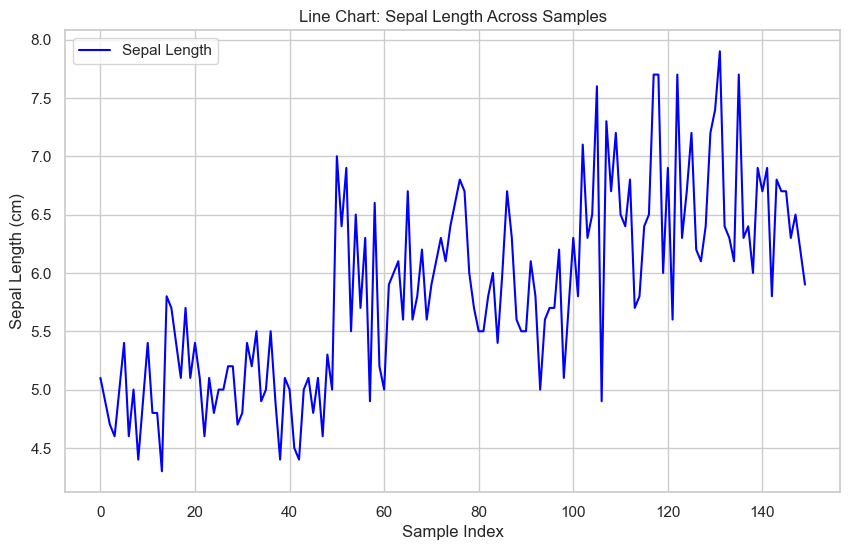

In [9]:
# Step 6a: Line chart - sepal length across samples
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df.index, df["sepal length (cm)"], label="Sepal Length", color="blue")
plt.title("Line Chart: Sepal Length Across Samples")
plt.xlabel("Sample Index")
plt.ylabel("Sepal Length (cm)")
plt.legend()
plt.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15736\3442519971.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  species_means = df.groupby("species")["sepal length (cm)"].mean()


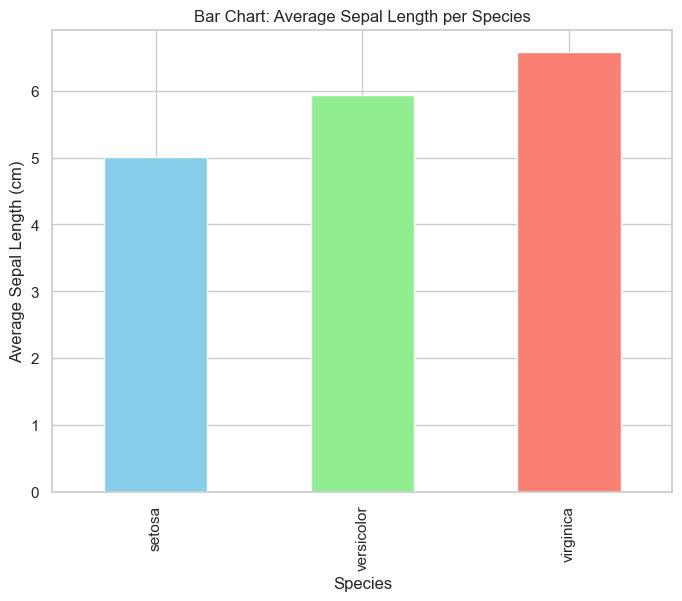

In [10]:
# Step 6b: Bar chart - average sepal length per species
species_means = df.groupby("species")["sepal length (cm)"].mean()

plt.figure(figsize=(8, 6))
species_means.plot(kind="bar", color=["skyblue", "lightgreen", "salmon"])
plt.title("Bar Chart: Average Sepal Length per Species")
plt.xlabel("Species")
plt.ylabel("Average Sepal Length (cm)")
plt.show()


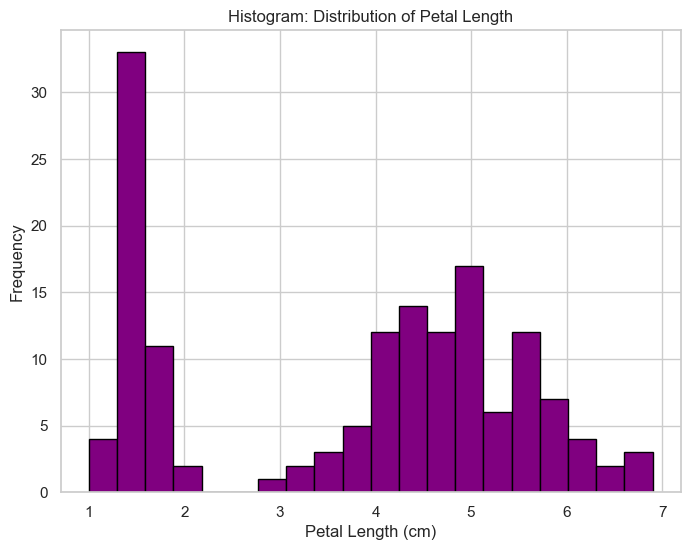

In [11]:
# Step 6c: Histogram - distribution of petal length
plt.figure(figsize=(8, 6))
plt.hist(df["petal length (cm)"], bins=20, color="purple", edgecolor="black")
plt.title("Histogram: Distribution of Petal Length")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Frequency")
plt.show()


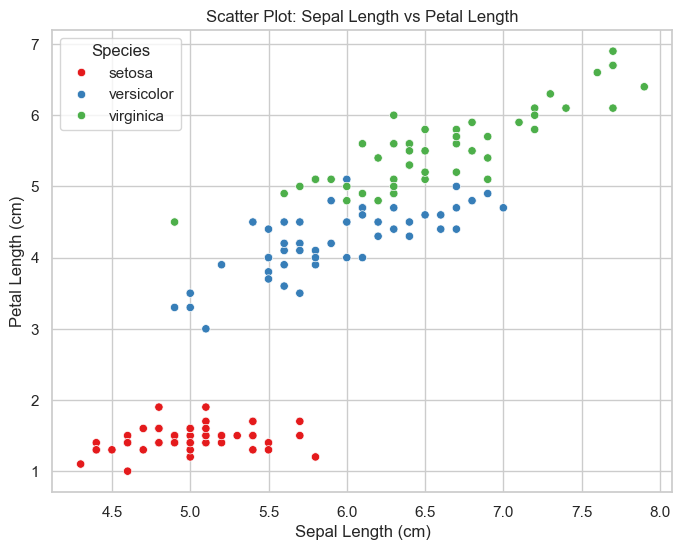

In [12]:
# Step 6d: Scatter plot - sepal length vs petal length
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="sepal length (cm)", y="petal length (cm)", hue="species", palette="Set1")
plt.title("Scatter Plot: Sepal Length vs Petal Length")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")
plt.legend(title="Species")
plt.show()


✍️ Findings / Observations
Based on the analysis of the Iris dataset:

General Summary Statistics

The average sepal length is about 5.84 cm, with values ranging from 4.3 cm to 7.9 cm.

Petal length shows the highest variation (std ≈ 1.76), meaning different species have very different petal sizes.

Sepal width has the least variation (std ≈ 0.44).

Species Comparisons (Grouped Means)

Setosa: Smallest flowers overall, with very short petals and narrower sepals.

Virginica: Largest flowers overall, with the longest petals and sepals.

Versicolor: Middle ground between Setosa and Virginica for most features.

Visual Insights

Line Chart: Shows natural variation in sepal length across all samples, no obvious outliers.

Bar Chart: Confirms Virginica consistently has the longest sepals on average.

Histogram: Petal length distribution is skewed; Setosa dominates the lower end, Virginica dominates the higher end.

Scatter Plot: Clearly separates Setosa from the others; Versicolor and Virginica overlap but still show a trend where larger sepal length corresponds to larger petal length.